## Jacquard Similarity

The Jaccard distance measures the dissimilarity between two sets as the size of the intersection divided by the size of the union of the sets.

In [133]:
# from src.preprocess import Preprocess
# dp = Preprocess()

In [134]:
# df = dp.main()
# df

In [135]:
import pandas as pd
from sklearn.metrics.pairwise import pairwise_distances

df = pd.read_csv('../data/processed/data.csv')
df.head()

,modelId,tags,pipeline_tag,author,architectures,model_type,datasets,downloads,library_name,soup
0,jonatasgrosman/wav2vec2-large-xlsr-53-english,pytorch jax safetensors wav2vec2 ...,automatic speech recognition,jonatasgrosman,wav2vec2forctc,wav2vec2,common voice mozilla foundation common vo...,47102358,transformers,pytorch jax safetensors wav2vec2 ...
1,bert-base-uncased,pytorch tf jax rust safetensors ...,fill mask,NaN,bertformaskedlm,bert,bookcorpus wikipedia,46484719,transformers,pytorch tf jax rust safetensors ...
2,Davlan/distilbert-base-multilingual-cased-ner-hrl,pytorch tf distilbert token classif...,token classification,davlan,distilbertfortokenclassification,distilbert,NaN,29407063,transformers,pytorch tf distilbert token classif...
3,gpt2,pytorch tf jax tflite rust sa...,text generation,NaN,gpt2lmheadmodel,gpt2,NaN,21999611,transformers,pytorch tf jax tflite rust sa...
4,xlm-roberta-base,pytorch tf jax onnx safetensors ...,fill mask,NaN,xlmrobertaformaskedlm,xlm roberta,NaN,20333162,transformers,pytorch tf jax onnx safetensors ...


In [136]:
df_js = df.drop('soup', axis=1)
df_js

,modelId,tags,pipeline_tag,author,architectures,model_type,datasets,downloads,library_name
0,jonatasgrosman/wav2vec2-large-xlsr-53-english,pytorch jax safetensors wav2vec2 ...,automatic speech recognition,jonatasgrosman,wav2vec2forctc,wav2vec2,common voice mozilla foundation common vo...,47102358,transformers
1,bert-base-uncased,pytorch tf jax rust safetensors ...,fill mask,NaN,bertformaskedlm,bert,bookcorpus wikipedia,46484719,transformers
2,Davlan/distilbert-base-multilingual-cased-ner-hrl,pytorch tf distilbert token classif...,token classification,davlan,distilbertfortokenclassification,distilbert,NaN,29407063,transformers
3,gpt2,pytorch tf jax tflite rust sa...,text generation,NaN,gpt2lmheadmodel,gpt2,NaN,21999611,transformers
4,xlm-roberta-base,pytorch tf jax onnx safetensors ...,fill mask,NaN,xlmrobertaformaskedlm,xlm roberta,NaN,20333162,transformers
...,...,...,...,...,...,...,...,...,...
9995,ans/vaccinating-covid-tweets,pytorch roberta text classification ...,text classification,ans,robertaforsequenceclassification,roberta,tweets,72,transformers
9996,bakrianoo/sinai-voice-ar-stt,pytorch wav2vec2 automatic speech reco...,automatic speech recognition,bakrianoo,wav2vec2forctc,wav2vec2,mozilla foundation common voice 8 0,72,transformers
9997,danyaljj/gpt2_question_generation_given_paragr...,pytorch gpt2 text generation transf...,text generation,danyaljj,gpt2lmheadmodel,gpt2,NaN,72,transformers
9998,dkleczek/Polish-Hate-Speech-Detection-Herbert-...,pytorch bert text classification tr...,text classification,dkleczek,bertforsequenceclassification,bert,NaN,72,transformers


In [137]:
df_js_one_hot = pd.get_dummies(df_js.iloc[:, 1:],dummy_na=True)


In [138]:
# Concatenate the encoded DataFrame with the modelId column
df_js_one_hot = pd.concat([df_js['modelId'], df_js_one_hot], axis=1)

In [139]:
df_js_one_hot.head()

,modelId,downloads,tags_,tags_ a2n dataset eugenesiow div2k dataset eugenesiow set5 dataset eugenesiow set14 dataset eugenesiow bsd100 dataset eugenesiow urban100 arxiv 2104 09497 arxiv 2104 07566 transformers super image image super resolution license apache 2 0 has space,tags_ aa dataset fka awesome chatgpt prompts arxiv 1910 09700 diffusers art code license unknown text to image has space,tags_ albert transformers,tags_ ar dataset common voice arxiv 1809 08895 arxiv 2109 06912 fairseq audio text to speech has space,tags_ ar eu br ca cv cs dv nl en eo et fr fy ka de el cnh id ia it ja kab rw ky lv mt mn fa pl pt ro rm ru sah sl es sv ta tt tr uk cy dataset urbansound8k arxiv 2106 04624 speechbrain audio classification embeddings language identification pytorch ecapa tdnn tdnn commonlanguage license apache 2 0 has space,tags_ ar stanza token classification license apache 2 0,tags_ awsrn dataset eugenesiow div2k dataset eugenesiow set5 dataset eugenesiow set14 dataset eugenesiow bsd100 dataset eugenesiow urban100 arxiv 1904 02358 arxiv 2104 07566 transformers super image image super resolution license apache 2 0 has space,...,library_name_speechbrain,library_name_stable baselines3,library_name_stable diffusion,library_name_stanza,library_name_timm,library_name_transformers,library_name_txtai,library_name_ultralytics,library_name_yolov5,library_name_nan
0,jonatasgrosman/wav2vec2-large-xlsr-53-english,47102358,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,bert-base-uncased,46484719,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,Davlan/distilbert-base-multilingual-cased-ner-hrl,29407063,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,gpt2,21999611,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,xlm-roberta-base,20333162,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [140]:
# Step 3: Calculate pairwise Jaccard similarity
similarity_matrix = 1 - pairwise_distances(df_js_one_hot.to_numpy(), metric='jaccard')
# print(similarity_matrix.shape)

/home/winnie/miniconda3/envs/Wan_Ying/lib/python3.9/site-packages/sklearn/metrics/pairwise.py:2025: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


In [141]:
print(similarity_matrix.shape)

(10000, 10000)


In [142]:
def get_recommendations(df_js, similarity_matrix, modelId, recommend_no, method = "jaccard"):
    if modelId in df['modelId'].values:
        index = df[df['modelId'] == modelId].index[0]
        print(f"Find model of index {index}")
        
    else:
        print(f'Error: product_name "{product_name}" not found in dataframe.')
    
    if "jaccard" == method.lower():
        similar_indices = similarity_matrix[index].argsort()[::-1][1:recommend_no+1]
        similar_models = df.iloc[similar_indices]['modelId']
        similarity_scores = similarity_matrix[index][similar_indices]
        
        print(f'Target Model: {df.iloc[index]["modelId"]}')
        print(f'{recommend_no} Recommended Models:\n{similar_models}')
        print(f'Similarity Scores: {similarity_scores}')
    
    else:
        print(f"{method} not supported")

In [143]:
get_recommendations(df_js_one_hot, similarity_matrix, "bert-base-uncased", 5, method="jaccard")

Find model of index 1
Target Model: bert-base-uncased
5 Recommended Models:
66                         bert-large-uncased
11                            bert-base-cased
303                          bert-large-cased
2091      bert-large-cased-whole-word-masking
218     bert-large-uncased-whole-word-masking
Name: modelId, dtype: object
Similarity Scores: [0.8 0.8 0.8 0.8 0.8]


In [144]:
df.iloc[[1,4376,9562, 3610]]

,modelId,tags,pipeline_tag,author,architectures,model_type,datasets,downloads,library_name,soup
1,bert-base-uncased,pytorch tf jax rust safetensors ...,fill mask,NaN,bertformaskedlm,bert,bookcorpus wikipedia,46484719,transformers,pytorch tf jax rust safetensors ...
4376,asafaya/bert-mini-arabic,pytorch tf jax safetensors bert ...,fill mask,asafaya,bertformaskedlm,bert,oscar wikipedia,478,transformers,pytorch tf jax safetensors bert ...
9562,anon-submission-mk/bert-base-macedonian-bulgar...,pytorch tf jax bert fill mask ...,fill mask,anon submission mk,bertformaskedlm,bert,NaN,81,transformers,pytorch tf jax bert fill mask ...
3610,jcblaise/bert-tagalog-base-cased,pytorch jax bert fill mask tl ...,fill mask,jcblaise,bertformaskedlm,bert,NaN,766,transformers,pytorch jax bert fill mask tl ...


In [145]:
get_recommendations(df_js_one_hot, similarity_matrix, "asafaya/bert-mini-arabic", 5, method="jaccard")

Find model of index 4376
Target Model: asafaya/bert-mini-arabic
5 Recommended Models:
4376                   asafaya/bert-mini-arabic
904                    asafaya/bert-base-arabic
5419                 asafaya/bert-medium-arabic
355     naver/splade-cocondenser-ensembledistil
5135                l3cube-pune/marathi-bert-v2
Name: modelId, dtype: object
Similarity Scores: [1.  1.  0.8 0.5 0.5]


In [146]:
# from sklearn.metrics import silhouette_score
# distance = pairwise_distances(df_js_one_hot.to_numpy(), metric='jaccard')

/home/winnie/miniconda3/envs/Wan_Ying/lib/python3.9/site-packages/sklearn/metrics/pairwise.py:2025: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


## Cosine Similarity

In [147]:
# Import CountVectorizer and create the count matrix
from sklearn.feature_extraction.text import CountVectorizer

# Compute the Cosine Similarity matrix based on the count_matrix
from sklearn.metrics.pairwise import cosine_similarity

count = CountVectorizer()
count_matrix = count.fit_transform(df['soup'])

#Construct a reverse map of indices and movie titles
indices = pd.Series(df.index, index=df['modelId']).drop_duplicates()

cosine_sim = cosine_similarity(count_matrix)

In [148]:
# import seaborn as sns
# sns.heatmap(cosine_sim, cmap="YlGnBu", annot=True)

In [149]:
def get_recommendations_cosine(df, cosine_sim, model, recommend_no):
    # Get the index of the movie that matches the title
    idx = indices[model]

    # Get the pairwise similarity scores of all models with that models
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the models based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the X most similar movies
    sim_scores = sim_scores[1:recommend_no+1]

    # Get the movie indices
    return_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar movies
    return df.iloc[return_indices]

In [150]:
cosine_sim_result = get_recommendations_cosine(df, cosine_sim, 'bert-base-uncased', 5)
print(cosine_sim_result['modelId'])

11                            bert-base-cased
66                         bert-large-uncased
218     bert-large-uncased-whole-word-masking
303                          bert-large-cased
2091      bert-large-cased-whole-word-masking
Name: modelId, dtype: object


In [151]:
# take jaccard similarity and compare again
get_recommendations(df_js_one_hot, similarity_matrix, "bert-base-uncased", 5, method="jaccard")

Find model of index 1
Target Model: bert-base-uncased
5 Recommended Models:
66                         bert-large-uncased
11                            bert-base-cased
303                          bert-large-cased
2091      bert-large-cased-whole-word-masking
218     bert-large-uncased-whole-word-masking
Name: modelId, dtype: object
Similarity Scores: [0.8 0.8 0.8 0.8 0.8]


## KNN

[sklearn.neighbors.NearestNeighbors — scikit-learn 1.2.2 documentation](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.NearestNeighbors.html)

In [152]:
from sklearn.neighbors import NearestNeighbors
knn_feat_cols = df_js_one_hot.iloc[:, 1:]
X = knn_feat_cols

In [153]:
knn = NearestNeighbors(n_neighbors=len(df_js), algorithm='auto').fit(X)
distances, indices = knn.kneighbors(X)

In [154]:
distances

array([[0.00000000e+00, 6.17639000e+05, 1.76952950e+07, ...,
        4.71022860e+07, 4.71022860e+07, 4.71022860e+07],
       [0.00000000e+00, 6.17639000e+05, 1.70776560e+07, ...,
        4.64846470e+07, 4.64846470e+07, 4.64846470e+07],
       [0.00000000e+00, 7.40745200e+06, 9.07390100e+06, ...,
        2.94069910e+07, 2.94069910e+07, 2.94069910e+07],
       ...,
       [0.00000000e+00, 1.73205081e+00, 2.44948974e+00, ...,
        2.94069910e+07, 4.64846470e+07, 4.71022860e+07],
       [0.00000000e+00, 1.73205081e+00, 2.82842712e+00, ...,
        2.94069910e+07, 4.64846470e+07, 4.71022860e+07],
       [0.00000000e+00, 2.82842712e+00, 3.00000000e+00, ...,
        2.94069910e+07, 4.64846470e+07, 4.71022860e+07]])

In [155]:
def get_recommendations_knn(df, distances, indices, modelId, recommend_no):
    if modelId in df['modelId'].values:
        index = df[df['modelId'] == modelId].index[0]
        print(f"Find model of index {index}")
        
    else:
        print(f'Error: product_name "{product_name}" not found in dataframe.')

    similar_indices = indices[index].argsort()[::-1][1:recommend_no+1]
    similar_models = df.iloc[similar_indices]['modelId']
    similarity_scores = 1 - distances[index][1:recommend_no+1]

    print(f'Target Model: {df.iloc[index]["modelId"]}')
    print(f'{recommend_no} Recommended Models:\n{similar_models}')
    print(f'Similarity Scores: {similarity_scores}') 

In [156]:
get_recommendations_knn(df_js, distances, indices, "bert-base-uncased", 5)

Find model of index 1
Target Model: bert-base-uncased
5 Recommended Models:
9991                BlightZz/DialoGPT-medium-Kurisu
9999    doyoungkim/bert-base-uncased-finetuned-sst2
9996                   bakrianoo/sinai-voice-ar-stt
9995                   ans/vaccinating-covid-tweets
9994                         Sunbird/sunbird-mul-en
Name: modelId, dtype: object
Similarity Scores: [  -617638.00000971 -17077655.00000035 -24485107.0000002
 -26151556.00000015 -35132931.00000017]


In [157]:
product_index = 1  # Index of product to recommend similar products for
k = 5  # Number of similar products to recommend
similar_indices = indices[product_index][1:k+1]  # Ignore first index, which is the product itself

# 4. Return the k most similar products
similar_products = df.iloc[similar_indices]['modelId']
similarity_scores = 1 - distances[product_index][1:k+1]  # Convert distances to similarities

print(f'Target Product: {df.iloc[product_index]["modelId"]}')
print(f'{k} Recommended Products:\n{similar_products}')
print(f'Similarity Scores: {similarity_scores}')

Target Product: bert-base-uncased
5 Recommended Products:
0        jonatasgrosman/wav2vec2-large-xlsr-53-english
2    Davlan/distilbert-base-multilingual-cased-ner-hrl
3                                                 gpt2
4                                     xlm-roberta-base
5                        openai/clip-vit-large-patch14
Name: modelId, dtype: object
Similarity Scores: [  -617638.00000971 -17077655.00000035 -24485107.0000002
 -26151556.00000015 -35132931.00000017]


## K-Means

In [158]:
df_js.head()

,modelId,tags,pipeline_tag,author,architectures,model_type,datasets,downloads,library_name
0,jonatasgrosman/wav2vec2-large-xlsr-53-english,pytorch jax safetensors wav2vec2 ...,automatic speech recognition,jonatasgrosman,wav2vec2forctc,wav2vec2,common voice mozilla foundation common vo...,47102358,transformers
1,bert-base-uncased,pytorch tf jax rust safetensors ...,fill mask,NaN,bertformaskedlm,bert,bookcorpus wikipedia,46484719,transformers
2,Davlan/distilbert-base-multilingual-cased-ner-hrl,pytorch tf distilbert token classif...,token classification,davlan,distilbertfortokenclassification,distilbert,NaN,29407063,transformers
3,gpt2,pytorch tf jax tflite rust sa...,text generation,NaN,gpt2lmheadmodel,gpt2,NaN,21999611,transformers
4,xlm-roberta-base,pytorch tf jax onnx safetensors ...,fill mask,NaN,xlmrobertaformaskedlm,xlm roberta,NaN,20333162,transformers


In [166]:
# df_kmean_mini = df_js.drop(columns=['tags', 'datasets', 'author'])
df_kmean_mini = df_js.drop('downloads', axis=1)

In [167]:
df_oh_feats = pd.get_dummies(df_kmean_mini.iloc[:, 1:])

In [ ]:
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# df_oh_feats = scaler.fit_transform(df_oh_feats)

## The elbow method


/home/winnie/miniconda3/envs/Wan_Ying/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/winnie/miniconda3/envs/Wan_Ying/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/winnie/miniconda3/envs/Wan_Ying/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/winnie/miniconda3/envs/Wan_Ying/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to su

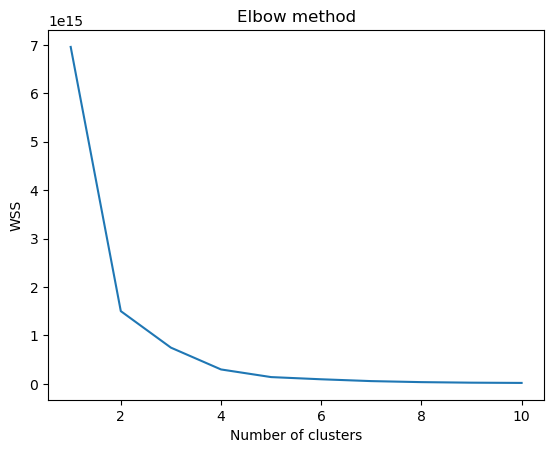

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Initialize an empty list to store the WSS values for different values of k
wss_values = []

# Loop through different values of k and compute the WSS for each value
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(df_oh_feats)
    wss_values.append(kmeans.inertia_)

# Plot the WSS values against the number of clusters
plt.plot(range(1, 11), wss_values)
plt.xlabel('Number of clusters')
plt.ylabel('WSS')
plt.title('Elbow method')
plt.show()

WSS measures the sum of squared distances of each data point from its own centroid. The "elbow" in the plot is a point where the decrease in SSD starts slows down. This indicates that adding more clusters does not result in a significant reduction in WSS and may instead lead to overfitting. The elbow method is a heuristic and may not always give a clear elbow point. In such cases, it can be helpful to consider other metrics or methods, such as the silhouette score or hierarchical clustering. 

## Evaluation metrics

1. Silhouette Score: Silhouette Coefficient measures the between-cluster distance against within-cluster distance. A higher score signifies better-defined clusters. The Silhouette Coefficient of a sample measures the average distance of a sample with all other points in the next nearest cluster against all other points in its cluster. A higher ratio signifies the cluster is far away from its nearest cluster and that the cluster is more well-defined. The Silhouette Coefficient for a set of samples takes the average Silhouette Coefficient for each sample. 

$s(i)$ = $(b(i) - a(i)) / \max(a(i), b(i))$

2. Davies Bouldin Score: The score is defined as the average similarity measure of each cluster with its most similar cluster, where similarity is the ratio of within-cluster distances to between-cluster distances. It measures the size of clusters against the average distance between clusters.The minimum score is zero, with lower values indicating better clustering.

DBI = (1/n) * ∑<sub>i</sub> max<sub>j</sub> (R<sub>i</sub> + R<sub>j</sub>) / d(c<sub>i</sub>, c<sub>j</sub>)

3. The Calinski-Harabasz Index, or Variance Ratio Criterion, measures the sum of between-cluster dispersion against the sum of within-cluster dispersion, where dispersion is the sum of distance squared.A higher score signifies better-defined clusters.

CH = $\frac{Tr(B)}{Tr(W)} * \frac{n - k}{k - 1}$


In [168]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
import numpy as np

# create a list of cluster numbers to try
cluster_list = range(2, 5)

def find_opt_n_cluster(X, cluster_list, metrics = 'silhouette_score'):
    scores = []

    for n_clusters in cluster_list:
        kmeans_model = KMeans(n_clusters=n_clusters, random_state=42)
        kmeans_model.fit(X)

        if metrics == 'silhouette_score':
            silhouette_avg = silhouette_score(X, kmeans_model.labels_)
            scores.append(silhouette_avg)
            optimal_cluster_num = cluster_list[np.argmax(scores)]
        elif metrics == 'davies_bouldin_score':
            db_score = davies_bouldin_score(X, kmeans_model.labels_)
            scores.append(db_score)
            optimal_cluster_num = cluster_list[np.argmin(scores)]
        elif metrics =="calinski_harabasz_score":
            ch_score = calinski_harabasz_score(X, kmeans_model.labels_)
            scores.append(ch_score)
            optimal_cluster_num = cluster_list[np.argmax(scores)]

    print(f'list of scores : {scores}')
    print(f'Optimal number of clusters with {metrics} is {optimal_cluster_num}')
    return optimal_cluster_num 

optimal_cluster_num = find_opt_n_cluster(df_oh_feats,cluster_list)


/home/winnie/miniconda3/envs/Wan_Ying/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/winnie/miniconda3/envs/Wan_Ying/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/winnie/miniconda3/envs/Wan_Ying/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


list of scores : [0.058287992213235613, 0.07140412945780888, 0.07048811285206794]
Optimal number of clusters with silhouette_score is 3


In [169]:

optimal_cluster_num = find_opt_n_cluster(df_oh_feats,cluster_list, metrics='davies_bouldin_score')

/home/winnie/miniconda3/envs/Wan_Ying/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/winnie/miniconda3/envs/Wan_Ying/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/winnie/miniconda3/envs/Wan_Ying/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


list of scores : [3.3687668836800913, 3.277186181664708, 2.5190556764814467]
Optimal number of clusters with davies_bouldin_score is 4


In [181]:
optimal_cluster_num = find_opt_n_cluster(df_oh_feats,cluster_list, metrics='calinski_harabasz_score')

/home/winnie/miniconda3/envs/Wan_Ying/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/winnie/miniconda3/envs/Wan_Ying/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/winnie/miniconda3/envs/Wan_Ying/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


list of scores : [624.6141444195785, 483.33215466614735, 454.9452818952223]
Optimal number of clusters with calinski_harabasz_score is 2


In [170]:

kmeans = KMeans(n_clusters=3)
kmeans.fit(df_oh_feats)

/home/winnie/miniconda3/envs/Wan_Ying/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [171]:
def get_recommendations_kmeans(df, df_encoded, model, modelId, recommend_no):
    # Encode the input product's features
    product_encoded = df[df['modelId'] == modelId].drop('modelId', axis=1)
    # print(product_encoded)
    # Predict the cluster of the input product
    cluster = kmeans.predict(product_encoded)
    # print(cluster)
    
    # Get indices of all products in the same cluster as the input product
    indices = df_encoded[kmeans.labels_ == cluster[0]].index
    
    # Compute similarity scores between the input product and all products in the same cluster
    similarity_scores = cosine_similarity(product_encoded, df_encoded.loc[indices])[0]
    print(similarity_scores)
    
    # Sort the products by similarity score and return top k recommendations
    similar_indices = similarity_scores.argsort()[::-1][1:recommend_no+1]
    similar_products = df.iloc[indices[similar_indices]]['modelId']
    
    return similar_products

In [172]:
# Concatenate the encoded DataFrame with the modelId column
df_oh = pd.concat([df_kmean_mini['modelId'], df_oh_feats], axis=1)

In [173]:
similar_products_kmeans = get_recommendations_kmeans(df_oh, df_oh_feats, kmeans, "bert-base-uncased", 5)
similar_products_kmeans

[0.15430335 1.         0.16666667 ... 0.16666667 0.33333333 0.3086067 ]


2091      bert-large-cased-whole-word-masking
218     bert-large-uncased-whole-word-masking
303                          bert-large-cased
66                         bert-large-uncased
11                            bert-base-cased
Name: modelId, dtype: object

In [174]:
from sklearn.metrics import silhouette_score,silhouette_samples
silhouette_avg = silhouette_score(df_oh_feats, kmeans.labels_)
sample_silhouette_values = silhouette_samples(df_oh_feats, kmeans.labels_)

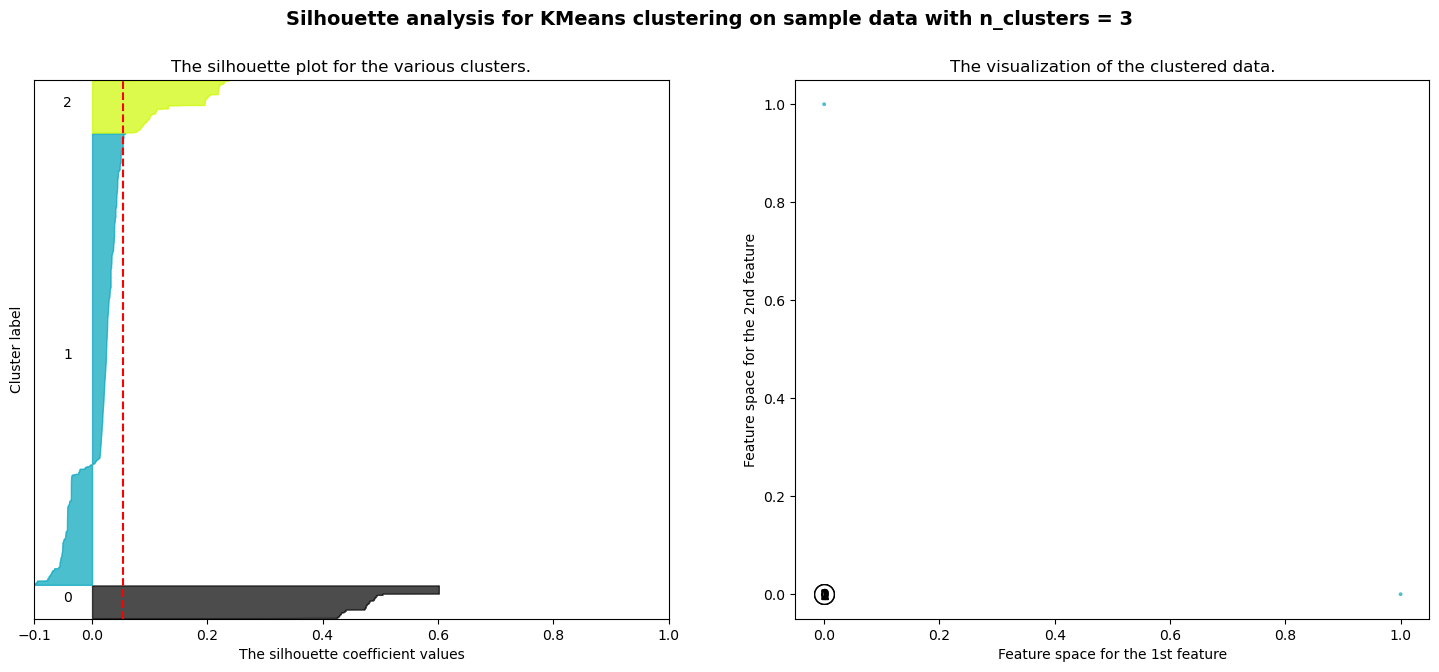

In [176]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

n_clusters = 3
# Create a subplot with 1 row and 2 columns
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(18, 7)
ax1.set_xlim([-0.1, 1])
ax1.set_ylim([0, len(df_oh_feats) + (n_clusters + 1) * 10])
y_lower = 10

for i in range(n_clusters):
    # Aggregate the silhouette scores for samples belonging to
    # cluster i, and sort them
    ith_cluster_silhouette_values = \
        sample_silhouette_values[kmeans.labels_ == i]

    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cm.nipy_spectral(float(i) / n_clusters)
    ax1.fill_betweenx(np.arange(y_lower, y_upper),
                        0, ith_cluster_silhouette_values,
                        facecolor=color, edgecolor=color, alpha=0.7)

    # Label the silhouette plots with their cluster numbers at the middle
    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    # Compute the new y_lower for next plot
    y_lower = y_upper + 10  # 10 for the 0 samples

ax1.set_title("The silhouette plot for the various clusters.")
ax1.set_xlabel("The silhouette coefficient values")
ax1.set_ylabel("Cluster label")

# The vertical line for average silhouette score of all the values
ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

ax1.set_yticks([])  # Clear the yaxis labels / ticks
ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

# 2nd Plot showing the actual clusters formed
colors = cm.nipy_spectral(kmeans.labels_.astype(float) / n_clusters)
ax2.scatter(df_oh_feats.values[:, 0], df_oh_feats.values[:, 1], marker='.', s=30, lw=0, alpha=0.7,
            c=colors, edgecolor='k')

# Labeling the clusters
centers = kmeans.cluster_centers_
# Draw white circles at cluster centers
ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
            c="white", alpha=1, s=200, edgecolor='k')

for i, c in enumerate(centers):
    ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                s=50, edgecolor='k')

ax2.set_title("The visualization of the clustered data.")
ax2.set_xlabel("Feature space for the 1st feature")
ax2.set_ylabel("Feature space for the 2nd feature")

plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                "with n_clusters = %d" % n_clusters),
                fontsize=14, fontweight='bold')

plt.show()


## Discussion
It is possible for the silhouette score to be high and the Davies Bouldin score to be low, but the clustering result to still not be good. This could happen in cases where the clustering algorithm is biased towards a certain cluster structure, such as when using k-means with a fixed number of clusters, but the underlying data does not have a clear cluster structure or when the cluster structure is not well-separated.

Silhouette score measures how well-defined the clusters are and how well-separated they are from each other. The higher the silhouette score, the more distinct and well-separated the clusters are. However, this metric alone may not be sufficient to evaluate the overall quality of the clustering, especially in cases where the data has a complex or overlapping structure. There are several reasons why a high silhouette score might not result in good clustering:

Outliers: The presence of outliers in the data can cause the clustering algorithm to group them into their own cluster, resulting in high cohesion and low separation, but this cluster may not be meaningful or useful in practice.

Biased algorithm: The clustering algorithm may be biased towards certain shapes or densities of clusters, which can cause it to miss important patterns in the data. In such cases, a high silhouette score may simply reflect that the algorithm is able to fit the data well to its preconceived notions of what a cluster should look like.

Incorrect number of clusters: A high silhouette score may be obtained for a suboptimal number of clusters, resulting in clusters that are too broad or too narrow to be useful.

Similarly, davies_bouldin_score may also not always accurately reflect the quality of the clustering if the data has a complex structure.

## PCA analysis

Principal components:
[[ 1.74007578e-04 -4.90693208e-05  2.60587252e-04 ...  4.99592855e-04
   1.08321288e-02  6.65899790e-03]
 [ 7.07381375e-06 -4.92014794e-05  1.40505918e-05 ... -1.38064318e-04
   5.44520546e-04  2.36530286e-04]
 [ 9.03824392e-06  7.09720643e-06  2.37118842e-05 ...  4.54807827e-04
   1.77764780e-04  3.67169758e-04]
 ...
 [-6.26002288e-06  3.30565750e-05 -2.07345961e-05 ... -2.88595891e-04
  -2.28611150e-04 -2.13326602e-04]
 [-5.27436769e-07  3.37658838e-05 -4.03947888e-06 ... -1.14865625e-04
   7.24614661e-05  4.62085724e-05]
 [-1.12478044e-04 -2.78481348e-05 -8.63713617e-04 ... -3.08119841e-04
  -5.67192110e-03 -4.86987337e-03]]


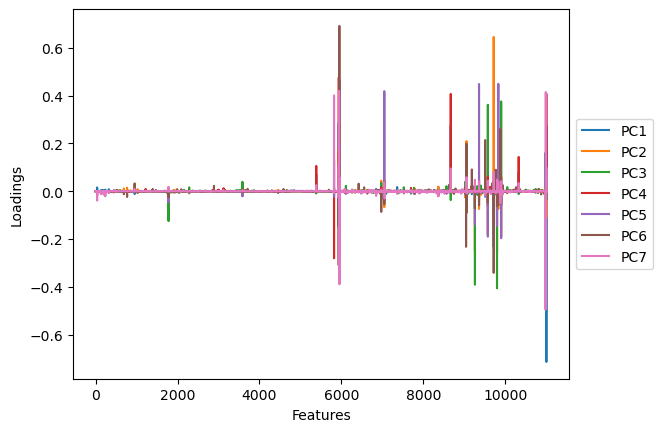

In [177]:
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt


# create a PCA object with 3 components
pca = PCA(n_components=7)

# fit the PCA model to the data
pca.fit(df_oh_feats)

# get the principal components
pcs = pca.components_

# print the principal components
print("Principal components:")
print(pcs)

# visualize the principal components
plt.figure()
plt.plot(pcs.T)
plt.legend(['PC1', 'PC2', 'PC3','PC4','PC5','PC6','PC7'], loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('Features')
plt.ylabel('Loadings')
plt.show()


Principal components are linear combinations of the original variables that capture the most variation in the data. The first principal component (PC1) explains the largest amount of variation in the data, followed by the second principal component (PC2), and so on.  The loadings represent the weights of each feature in the corresponding principal component and can be interpreted as the contribution of each feature to the overall variation captured by the component.Features with large positive or negative loadings have a strong influence on the corresponding principal component, while features with loadings close to zero have little influence. The sign of the loading indicates the direction of the feature's influence on the component. A positive loading means that higher values of the feature are associated with higher scores on the component, while a negative loading means that higher values of the feature are associated with lower scores on the component. 

<AxesSubplot: xlabel='PC1', ylabel='PC2'>

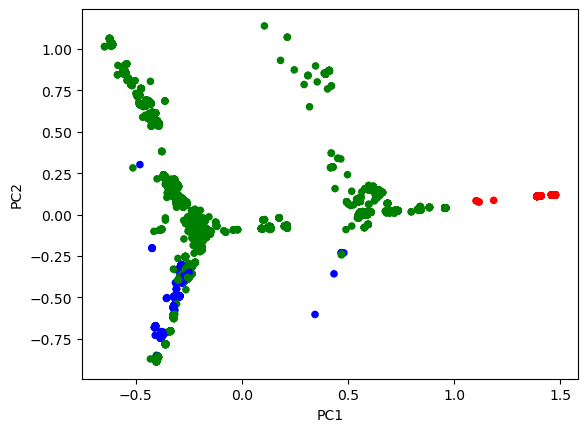

In [180]:
labels = kmeans.labels_
pca = PCA(n_components=2)
pca.fit(df_oh_feats)
transformed_data  = pca.transform(df_oh_feats)
transformed_df = pd.DataFrame(data=transformed_data, columns=['PC1', 'PC2'])
transformed_df['label'] = labels
colors = {0: 'red', 1: 'green', 2: 'blue'}
transformed_df.plot.scatter(x='PC1', y='PC2', c=transformed_df['label'].apply(lambda x: colors[x]))


In [ ]:
# from scipy.cluster.hierarchy import dendrogram, linkage

# # Compute the linkage matrix using Ward's method
# Z = linkage(df_oh_feats, 'ward')

# # Plot the dendrogram
# plt.figure(figsize=(8, 6))
# plt.title('Hierarchical Clustering Dendrogram')
# plt.xlabel('Data point')
# plt.ylabel('Distance')
# dendrogram(Z)
# plt.show()
